# Gradient Boosting

# Gradient Boosting From Scratch

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Make Initial Prediction Using First Simple Tree
tree_reg1 = DecisionTreeRegressor(max_depth=2) # Unlike AdaBoost we often use depths > 1
tree_reg1.fit(X, y) #Fit the tree to the training values to create the first tree for our initial predictions

# Second tree
# Calculate Residual Values and then make prediction on residuals
y2 = y - tree_reg1.predict(X) # Calculate Residuals. # tree_reg1.predict(X) is our y_pred using the first tree
tree_reg2 = DecisionTreeRegressor(max_depth=2) #Create a simple tree
tree_reg2.fit(X, y2) # Fit the residual values from tree one to create a new tree

# Third Tree
# Calculate Residual Values and then make prediction on residuals
y3 = y2 - tree_reg2.predict(X) # Calculate Residuals. # tree_reg1.predict(X) is our y_pred using the second tree
tree_reg3 = DecisionTreeRegressor(max_depth=2) # Create a simple tree
tree_reg3.fit(X, y3) # Fit the residual values from tree two to create a new tree

###### Now we have an ensemble containing three trees. 
##### It can make predictions on a new instance simply by adding up the predictions of all the trees
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))





# From Scratch Example from Notes

In [1]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))


print('tree_reg1.predict : ', tree_reg1.predict(X_new) )
print('tree_reg2.predict : ', tree_reg2.predict(X_new) )
print('tree_reg3.predict : ', tree_reg3.predict(X_new) )
print('---------- ------------')
print('Gradient Boosting Prediction for y: ', y_pred )
print('---------- ------------')


tree_reg1.predict :  [0.52856846]
tree_reg2.predict :  [0.03991297]
tree_reg3.predict :  [0.18178637]
---------- ------------
Gradient Boosting:  [0.75026781]
---------- ------------


# Implementation Using scikit learn

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [4]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


# Use Gradient Booster to Implement Gradient Boosting
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, 
                                 learning_rate=1.0, random_state=42)
# max_depth is the depth of each of the indiv  trees
# n_estimators is how many trees to build

model = gbrt.fit(X, y)

X_new = np.array([[0.8]])
print('gbrt.predict y value : ', gbrt.predict(X_new) )


from sklearn.metrics import mean_squared_error, r2_score

"""
# Performance metrics
mse = mean_squared_error(y_test, gbrt.predict(X_new))
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
"""


gbrt.predict y value :  [0.75026781]


# Comprehensive Gradient Boosting Example

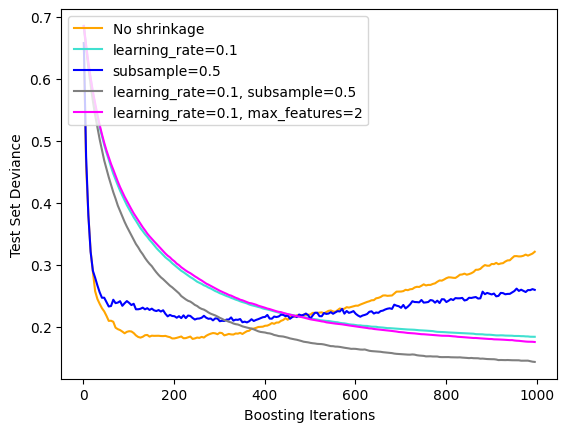

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets

from sklearn.metrics import log_loss


X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)
    # The update() method of a dictionary takes another dictionary as an argument and updates the original dictionary 
    # with the key-value pairs from the provided dictionary. 
    # If a key in setting already exists in params, its value is overwritten in params; if a key does not exist, it is added to params.
    # setting is the third param in the for loop and is a dict that contains learning_rate and subsample or max_features

    clf = ensemble.GradientBoostingClassifier(**params)
    # ** is used to unpack the contents of a dictionary into keyword arguments. 
    # This means each key-value pair in the dictionary is passed as a separate keyword argument to the function.
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    #for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
    #    test_deviance[i] = clf.loss(y_test, y_pred)

    from sklearn.metrics import log_loss

    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.savefig('xgboost.png')